In [275]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [276]:
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_score, 
    recall_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [277]:
df = pd.read_csv("../our_analyses/dataset_prepared.csv")

In [278]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,afrobeat
1,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,afrobeat
2,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,afrobeat
3,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,afrobeat
4,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,afrobeat


In [279]:
df = df[df['genre'].isin(['sleep', 'black-metal', "techno"])]

In [280]:
from sklearn.preprocessing import LabelEncoder

df=df.drop(['name', 'artists', 'album_name'], axis=1)

mode_order = sorted(df['genre'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print (mode_order_mapping)

df['genre'] = df['genre'].map (mode_order_mapping).astype(int)

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

{'black-metal': 0, 'sleep': 1, 'techno': 2}


In [281]:
df.describe()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
count,2.250000e+03,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,2.640783e+05,0.064889,29.951111,0.391809,0.659264,5.242667,-12.521895,0.667556,0.073427,0.256205,0.552979,0.251958,0.201931,114.719459,3.679556,1.000000
std,1.824933e+05,0.246384,18.331523,0.248605,0.336349,3.571633,9.388408,0.471194,0.060749,0.375575,0.381920,0.234094,0.210935,37.000077,0.952859,0.816678
min,2.400000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.701755e+05,0.000000,17.000000,0.172000,0.455250,2.000000,-17.135250,0.000000,0.042200,0.000160,0.079200,0.101000,0.038300,93.626500,4.000000,0.000000
50%,2.288805e+05,0.000000,30.000000,0.353500,0.796000,6.000000,-8.622500,1.000000,0.054900,0.013100,0.727000,0.137000,0.130000,122.551500,4.000000,1.000000
75%,3.299665e+05,0.000000,44.000000,0.614000,0.941000,8.000000,-5.894250,1.000000,0.083675,0.485250,0.890000,0.330000,0.295750,135.143000,4.000000,2.000000
max,4.120258e+06,1.000000,94.000000,0.958000,1.000000,11.000000,1.795000,1.000000,0.579000,0.996000,1.000000,0.994000,0.977000,214.864000,5.000000,2.000000


In [282]:
X = df.values
y = np.array(df['genre'])
X = df.drop('genre', axis=1)

## Partitioning

In [283]:
from sklearn.model_selection import train_test_split

random_state = 0

In [284]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=random_state
)

print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test), ("\n"))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333] 

(1350, 15) (900, 15) (1350,) (900,)


## normalization

In [285]:
from sklearn.preprocessing import StandardScaler

In [286]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [287]:
from sklearn.neighbors import KNeighborsClassifier

In [288]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [289]:
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2,
       2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2,

In [290]:
clf.score(X_test_norm, y_test)

0.8722222222222222

In [291]:
(y_test_pred == y_test).sum() / len(y_test)

0.8722222222222222

In [292]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.8722222222222222


In [293]:
from sklearn.model_selection import learning_curve

In [294]:
print("F1 macro:", f1_score(y_test, y_test_pred, average="macro"), "\n")
print("F1 micro:", f1_score(y_test, y_test_pred, average="micro"), "\n")
unique_labels = np.unique(y_test)

for label in unique_labels:
    print(f"F1 macro for label {label}:", f1_score(y_test, y_test_pred, labels=[label], average="macro"))
print("\n")
for label in unique_labels:
    print(f"F1 micro for label {label}:", f1_score(y_test, y_test_pred, labels=[label], average="micro"))

F1 macro: 0.8724233285714321 

F1 micro: 0.8722222222222223 

F1 macro for label 0: 0.8580542264752792
F1 macro for label 1: 0.9235993208828523
F1 macro for label 2: 0.8356164383561644


F1 micro for label 0: 0.8580542264752792
F1 micro for label 1: 0.9235993208828523
F1 micro for label 2: 0.8356164383561644


In [295]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       300
           1       0.94      0.91      0.92       300
           2       0.86      0.81      0.84       300

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900



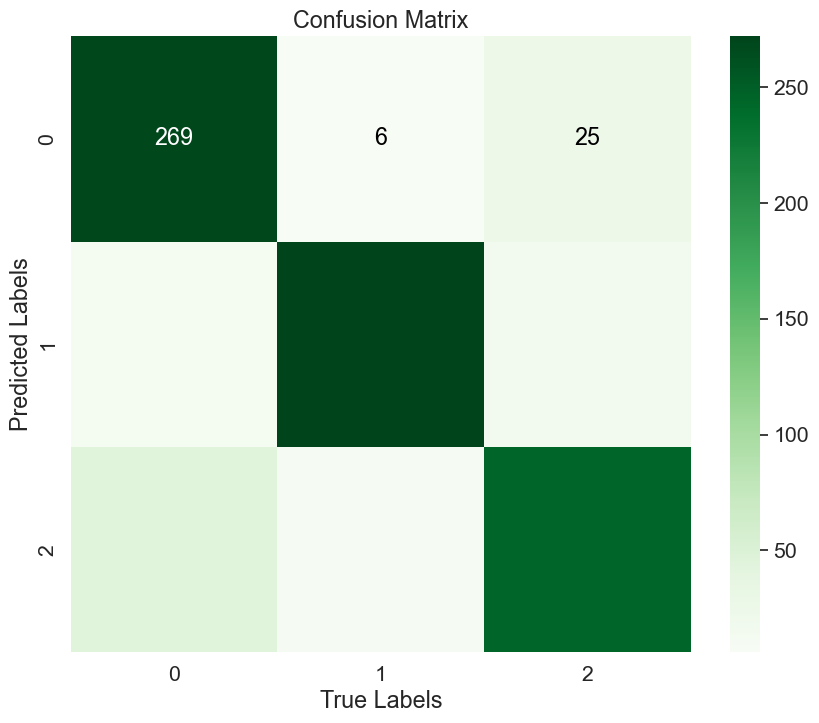

In [296]:
# cf = confusion_matrix(y_test, y_test_pred)
# # cf = confusion_matrix(y_test, y_test_pred, normalize="true")

# # Imposta le dimensioni del plot e la scala del font
# plt.figure(figsize=(12, 12))
# sns.set(font_scale=1.2)

# # Crea il heatmap della matrice di confusione
# sns.heatmap(cf, annot=True, cmap="plasma", fmt='g')

# # Aggiunge titoli e etichette
# plt.title('Confusion Matrix')
# plt.xlabel('True Labels')
# plt.ylabel('Predicted Labels')

# # Ruota le etichette se necessario
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)

# # Mostra il plot
# plt.show()

cf = confusion_matrix(y_test, y_test_pred)

# Calcola il valore massimo della matrice per stabilire la soglia del colore del testo
threshold = cf.max() / 2

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)

# Crea il heatmap della matrice di confusione
sns.heatmap(cf, annot=True, fmt='d', cmap='Greens',
            annot_kws={'color': 'black'})

# Aggiungi i titoli e le etichette
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

# Qui cambiamo il colore dell'annotazione in base al valore della cella
for text, value in zip(plt.gca().texts, cf.flatten()):
    text.set_color('white' if value > threshold else 'black')

plt.show()

In [297]:
y_test_pred_proba = clf.predict_proba(X_test_norm) 
y_test_pred_proba[0:10]

array([[0. , 0. , 1. ],
       [0.6, 0. , 0.4],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0.2, 0. , 0.8],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ]])

train_sizes = np.linspace(0.1, 1.0, 10)

Questa riga crea un array di dieci numeri che sono equamente spaziati tra 0.1 e 1.0. Questi numeri rappresenteranno le proporzioni del set di allenamento che verranno utilizzate per generare la curva di apprendimento. Ad esempio, se hai 1000 esempi di allenamento, il primo punto della curva di apprendimento userà il 10% di questi dati, cioè 100 esempi.

estimator=clf

Qui, stai assegnando il tuo modello k-NN, che hai chiamato clf nello screenshot precedente, alla variabile estimator. Questo modello verrà utilizzato dalla funzione learning_curve per allenare e testare il modello.

X = df.drop('genre', axis=1)
y = df['genre']

Queste due righe selezionano le features e il target dal tuo DataFrame. X contiene tutte le colonne tranne 'genre', che è la colonna del target che si presume tu voglia prevedere. y contiene i valori della colonna 'genre'.

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

Qui, crei un oggetto StandardScaler, che normalizza i dati delle features sottraendo la media e dividendo per la deviazione standard. Poi utilizzi questo oggetto per trasformare i tuoi dati in X_norm, che sono i dati delle features normalizzati.

train_sizes, train_scores, test_scores = learning_curve(...)

Questa funzione calcola la curva di apprendimento. Allena il tuo modello (clf) su diverse porzioni del set di dati (definite da train_sizes) e calcola i punteggi di accuratezza sul training set e sul test set. La cross-validation a 10 fold (cv=10) è utilizzata per valutare l'accuratezza del modello, che significa che i dati vengono divisi in 10 parti, con 9 utilizzate per l'allenamento e 1 per il test, e questo processo è ripetuto 10 volte con parti diverse utilizzate come test set.

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Queste righe calcolano la media e la deviazione standard delle accuratezze ottenute durante la cross-validation sia per il training set sia per il test set. Ti permettono di vedere non solo come l'accuratezza cambia con diversi set di dati di allenamento, ma anche quanto sono variabili i risultati (indicati dalla deviazione standard).

Le ultime righe di codice (plt.figure(figsize=(10, 6)) fino a plt.show()) generano un grafico che mostra la curva di apprendimento. Mostrano l'accuratezza media sul training set e sul test set (anche chiamato validation set) in funzione della dimensione del training set, con le aree ombreggiate che rappresentano la deviazione standard. Il grafico è intitolato "Learning Curve for k-NN Classifier" e ha le etichette sugli assi appropriate per la dimensione dei dati di allenamento e l'accuratezza.

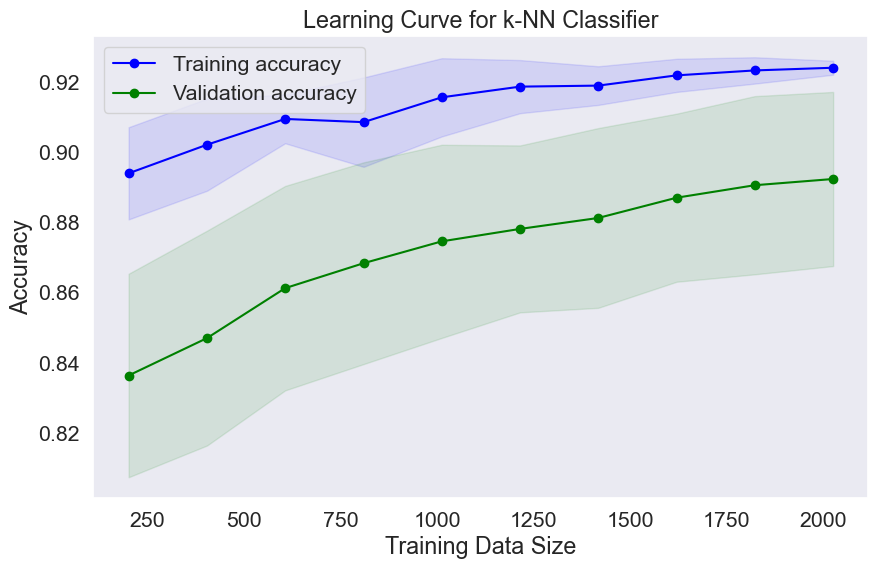

In [298]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Utilizza l'oggetto classificatore 'clf' che hai definito nel tuo screenshot
estimator=clf


X = df.drop('genre', axis=1)
y = df['genre']

# Normalizza l'intero dataset prima di passarlo alla funzione 'learning_curve'
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Ora puoi utilizzare 'X_norm' e 'y' nella funzione 'learning_curve'
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf, X=X_norm, y=y, train_sizes=train_sizes, cv=10,
    scoring='accuracy', n_jobs=-1, shuffle=True, random_state=0
)


# Calcola la media e la deviazione standard dell'accuratezza del training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calcola la media e la deviazione standard dell'accuratezza del test set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotta la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve for k-NN Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()